In [21]:
import pandas as pd 
import numpy as np

In [22]:
df=pd.read_csv("C:/Users/Azerty/Downloads/house-prices-advanced-regression-techniques (5)/train.csv")

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# Заполняем отсутствующие значения для числовых столбцов медианой
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().any():  # Проверяем, есть ли отсутствующие значения
        df[col].fillna(df[col].median(), inplace=True)


C:\Users\Azerty\AppData\Local\Temp\ipykernel_11972\1646083031.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Azerty\AppData\Local\Temp\ipykernel_11972\1646083031.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [26]:
# Заполняем отсутствующие значения для категориальных переменных модой
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():  # Проверяем, есть ли отсутствующие значения
        mode_value = df[col].mode()
        if not mode_value.empty:  # Проверяем, не пустой ли режим
            df[col].fillna(mode_value[0], inplace=True)


C:\Users\Azerty\AppData\Local\Temp\ipykernel_11972\2955782433.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value[0], inplace=True)


In [27]:

df.info() # Показывает информацию о DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
df.isnull().sum().sum()

np.int64(0)

In [29]:
# Проверяем на дублирующиеся строки
duplicates = df.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicates}")

# Удаляем дублирующиеся строки, если они есть
if duplicates > 0:
    df.drop_duplicates(inplace=True)


Количество дублирующихся строк: 0


In [30]:
# Преобразуем категориальные переменные в тип 'category'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')


In [31]:
df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object

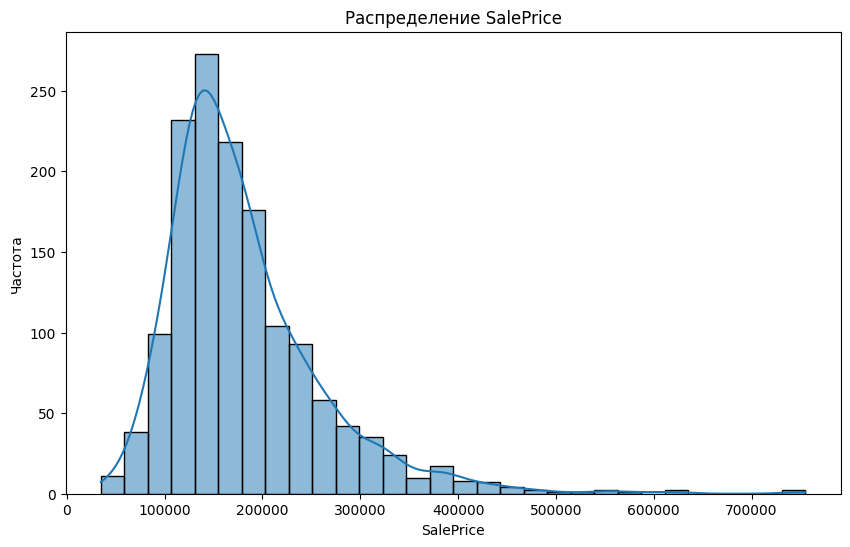

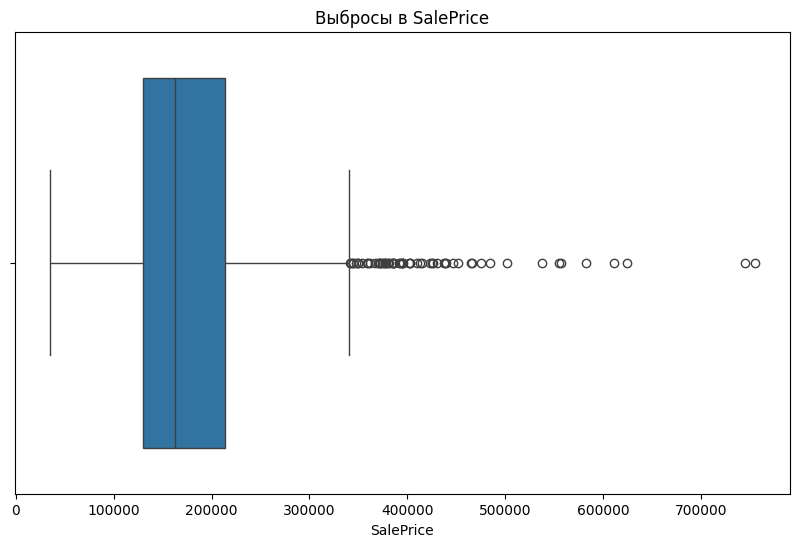

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма для целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

# Проверка на выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Выбросы в SalePrice')
plt.show()


In [ ]:
# Сначала убедимся, что все категориальные переменные были обработаны
# Применение one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Теперь мы можем вычислить корреляционную матрицу
correlation_matrix = df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


In [ ]:
# Визуализация 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Взаимосвязь между GrLivArea и SalePrice')
plt.show()

# Визуализация 'GarageCars'
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('Взаимосвязь между GarageCars и SalePrice')
plt.show()



In [ ]:
# Создание новой характеристики: возраст дома
df['HouseAge'] = 2023 - df['YearBuilt']  # Предполагаем, что текущий год - 2023


In [ ]:
# Сохранение очищенного и преобразованного набора данных
df.to_csv('cleaned_house_prices.csv', index=False)
